In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.pipeline import Pipeline

In [2]:
import pingouin as pg

In [3]:
from feature_engine import transformation as vt

In [4]:
from sklearn import datasets
boston_data = datasets.load_boston()
df = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df['target'] = pd.Series(boston_data.target)

df = df.filter(['DIS','LSTAT', 'target'])
df.head()

/workspace/data-analytics/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

,DIS,LSTAT,target
0,4.0900,4.98,24.0
1,4.9671,9.14,21.6
2,4.9671,4.03,34.7
3,6.0622,2.94,33.4
4,6.0622,5.33,36.2


*** DIS ***


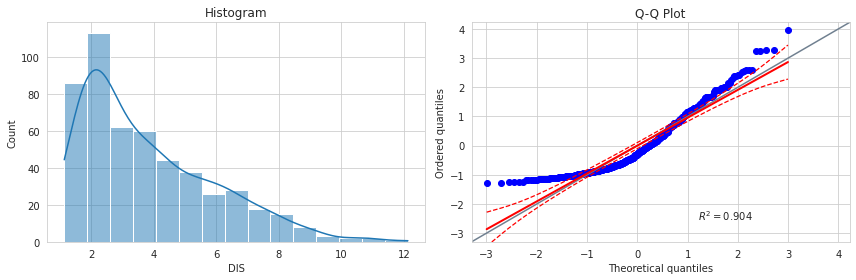

before apply transformation  | skewness: 1.01 | kurtosis: 0.49


*** LSTAT ***


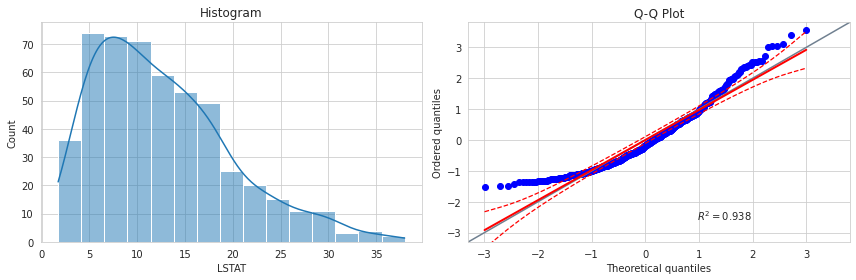

before apply transformation  | skewness: 0.91 | kurtosis: 0.49


*** target ***


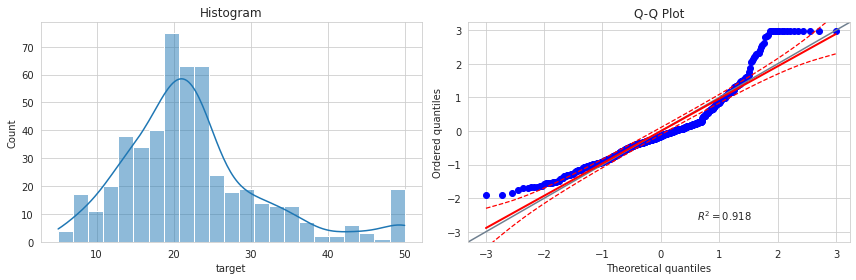

before apply transformation  | skewness: 1.11 | kurtosis: 1.5




In [5]:
def calculate_skew_kurtosis(df,col, moment):
  print(f"{moment}  | skewness: {df[col].skew().round(2)} | kurtosis: {df[col].kurtosis().round(2)}")


def distribution_before_applying_transformer(df):
  for col in df.columns:
    print(f"*** {col} ***")
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
    sns.histplot(data=df, x=col, kde=True, ax=axes[0])
    axes[0].set_title("Histogram")
    pg.qqplot(df[col], dist='norm',ax=axes[1])
    plt.tight_layout()
    plt.show()
    calculate_skew_kurtosis(df,col,'before apply transformation')
    print("\n")

distribution_before_applying_transformer(df)

In [6]:
pipeline = Pipeline([
      ( 'log', vt.LogTransformer() )
  ])

df_transformed = pipeline.fit_transform(df)
df_transformed.head()

,DIS,LSTAT,target
0,1.408545,1.605430,3.178054
1,1.602836,2.212660,3.072693
2,1.602836,1.393766,3.546740
3,1.802073,1.078410,3.508556
4,1.802073,1.673351,3.589059


*** DIS ***


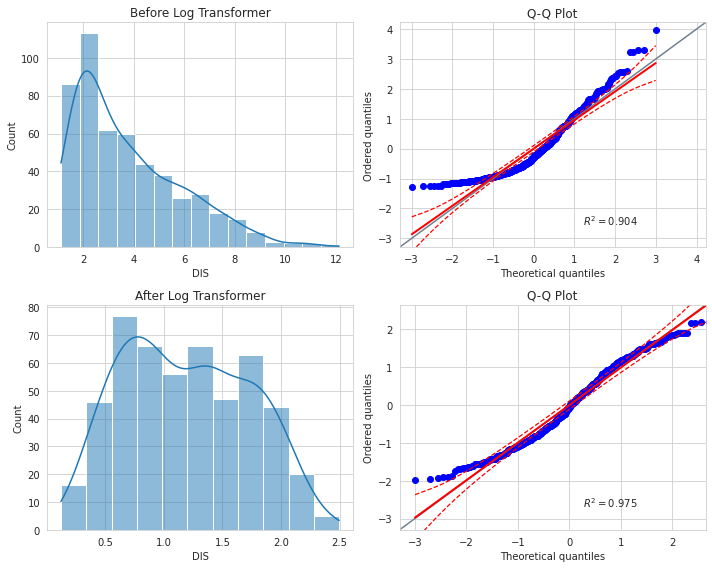

before transformation  | skewness: 1.01 | kurtosis: 0.49
after transformation  | skewness: 0.15 | kurtosis: -0.99


*** LSTAT ***


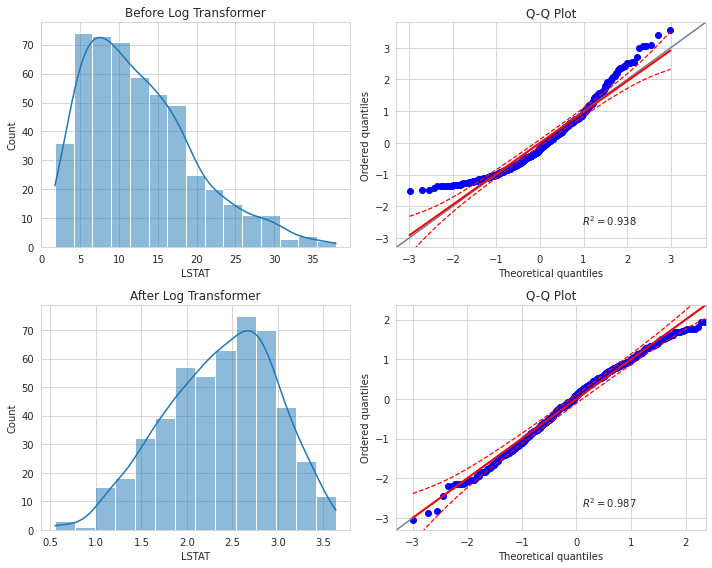

before transformation  | skewness: 0.91 | kurtosis: 0.49
after transformation  | skewness: -0.32 | kurtosis: -0.43


*** target ***


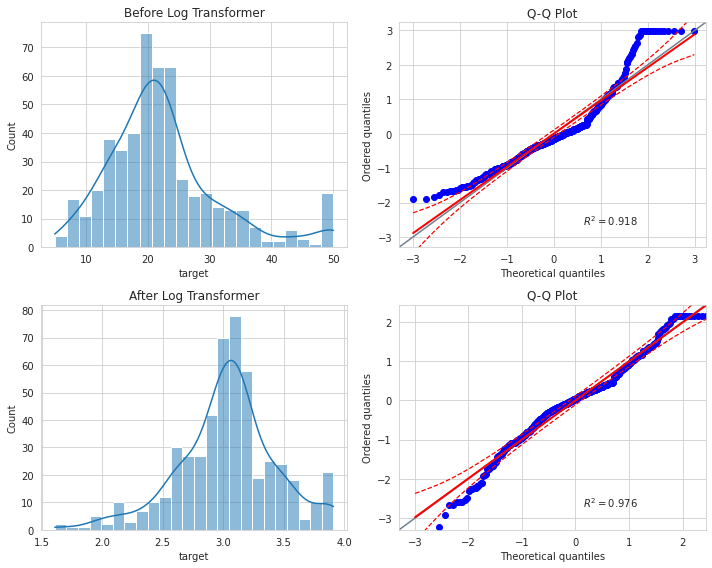

before transformation  | skewness: 1.11 | kurtosis: 1.5
after transformation  | skewness: -0.33 | kurtosis: 0.81




In [7]:
def compare_distributions_before_and_after_applying_transformer(df, df_transformed, method):

  for col in df.columns:
    print(f"*** {col} ***")
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

    sns.histplot(data=df, x=col, kde=True, ax=axes[0,0])
    axes[0,0].set_title(f'Before {method}')
    pg.qqplot(df[col], dist='norm',ax=axes[0,1])
    
    sns.histplot(data=df_transformed, x=col, kde=True, ax=axes[1,0])
    axes[1,0].set_title(f'After {method}')
    pg.qqplot(df_transformed[col], dist='norm',ax=axes[1,1])
    
    plt.tight_layout()
    plt.show()

    calculate_skew_kurtosis(df,col, moment='before transformation')
    calculate_skew_kurtosis(df_transformed,col, moment='after transformation')
    print("\n")


compare_distributions_before_and_after_applying_transformer(df, df_transformed, method='Log Transformer')